## Observations and Insights 

In [182]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Homework/Matplotlib/pymaceuticals/Resources/Mouse_metadata.csv"
study_results_path = "Homework/pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on='Mouse ID')

# Display the data table for preview
data_complete.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [82]:
drugs = data_complete['Drug Regimen'].drop_duplicates(keep='first')
print(drugs)

0       Ramicane
10     Capomulin
454    Infubinol
474      Placebo
484     Ceftamin
494     Stelasyn
501    Zoniferol
511     Ketapril
541     Propriva
558     Naftisol
Name: Drug Regimen, dtype: object


In [83]:
# Checking the number of mice.
data_complete.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [84]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = data_complete[data_complete.duplicated(['Mouse ID'])]
duplicate_id.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data_complete[data_complete.duplicated()]
duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = pd.DataFrame(data_complete.drop_duplicates(keep='last'))
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1892 non-null object
Drug Regimen          1892 non-null object
Sex                   1892 non-null object
Age_months            1892 non-null int64
Weight (g)            1892 non-null int64
Timepoint             1892 non-null int64
Tumor Volume (mm3)    1892 non-null float64
Metastatic Sites      1892 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.0+ KB


In [87]:
# Checking the number of mice in the clean DataFrame.
mice_num =  clean_data['Mouse ID'].count()
uniq_num = len(clean_data['Mouse ID'].unique())
uniq_num

249

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the en

tumor_drug_Mean =  clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().round(2)
tumor_drug_Median = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median().round(2)
tumor_drug_Std = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std().round(2)
tumor_drug_var = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var().round(2)
tumor_drug_SEM = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem().round(2)

summary_df = pd.DataFrame({'Tumor volume Mean': tumor_drug_Mean, 'Tumor volume Median': tumor_drug_Median, 
                           'Tumor volume Std': tumor_drug_Std, 
                           'Tumor volume Variance': tumor_drug_var, 
                           'Tumor volume SEM': tumor_drug_SEM})




summary_df

,Tumor volume Mean,Tumor volume Median,Tumor volume Std,Tumor volume Variance,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.37,50.91,6.50,42.28,0.51
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


In [89]:
tumor_regimen = clean_data.groupby(
    ['Drug Regimen'])['Tumor Volume (mm3)'].agg([
    'mean', 'median', 'std', 'var','sem']
).round(2).rename(columns={
    'mean':'Tumor volume Mean', 
    'median': 'Tumor volume Median', 
    'std': 'Tumor volume Std', 
    'var': 'Tumor volume Variance', 
    'sem': 'Tumor volume SEM'}).reset_index()  

tumor_regimen.head(20)

,Drug Regimen,Tumor volume Mean,Tumor volume Median,Tumor volume Std,Tumor volume Variance,Tumor volume SEM
0,Capomulin,40.68,41.56,4.99,24.95,0.33
1,Ceftamin,52.59,51.78,6.27,39.29,0.47
2,Infubinol,52.88,51.82,6.57,43.13,0.49
3,Ketapril,55.24,53.70,8.28,68.55,0.60
4,Naftisol,54.33,52.51,8.13,66.17,0.60
5,Placebo,54.03,52.29,7.82,61.17,0.58
6,Propriva,52.37,50.91,6.50,42.28,0.51
7,Ramicane,40.22,40.67,4.85,23.49,0.32
8,Stelasyn,54.23,52.43,7.71,59.45,0.57
9,Zoniferol,53.24,51.82,6.97,48.53,0.52


## Bar and Pie Charts

In [90]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
study_mice = clean_data.groupby(['Drug Regimen'])['Mouse ID'].count() 
study_mice.reset_index()

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,160
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0.5, 1.0, 'Total Number of Mice Per Treatment')

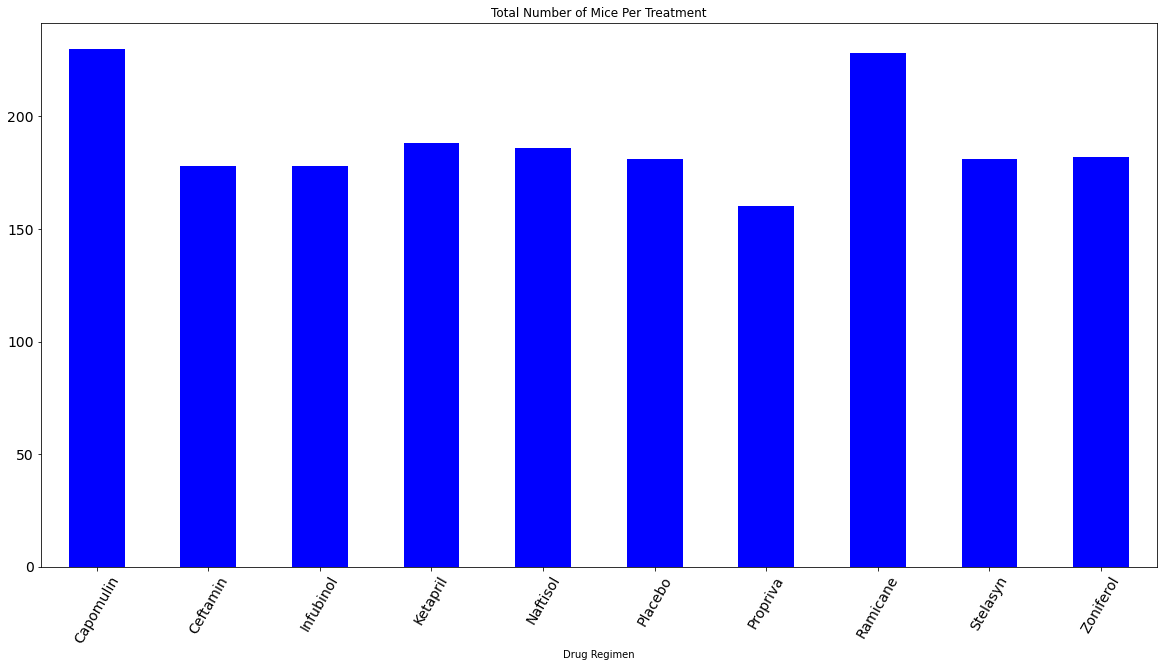

In [91]:
# Bargraph
study_mice.plot(kind="bar", facecolor="blue", figsize=(20, 10), fontsize='14')
plt.xticks(rotation=60)
plt.ylabel = 'Number of mice'
plt.title('Total Number of Mice Per Treatment')



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98c04269d0>],
      dtype=object)

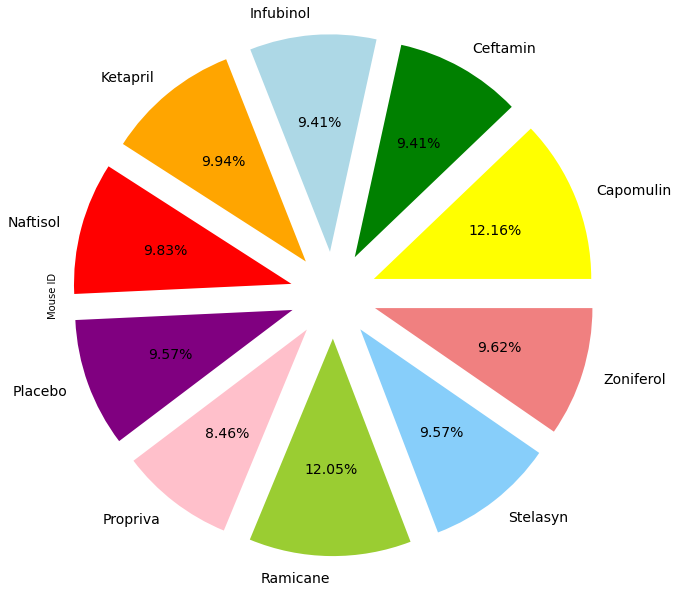

In [126]:
# Pie Chart
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
study_mice.plot.pie(y='Drug Regimen', subplots=True, 
                        colors=("yellow","green","lightblue","orange","red","purple","pink",
                                "yellowgreen","lightskyblue","lightcoral"), 
                        figsize=(12, 10), 
                        explode=explode, autopct="%.2f%%", fontsize='14')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98c0903750>],
      dtype=object)

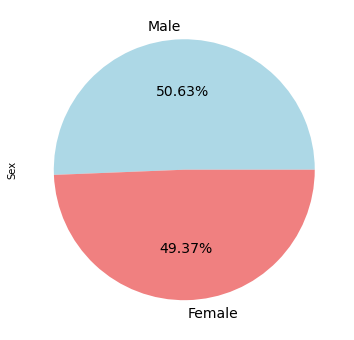

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_vs_male = clean_data['Sex'].value_counts()
female_vs_male.plot.pie(y='Drug Regimen', subplots=True, 
                        colors=("lightblue", "lightcoral"), 
                        figsize=(11, 6), autopct="%.2f%%", fontsize='14')

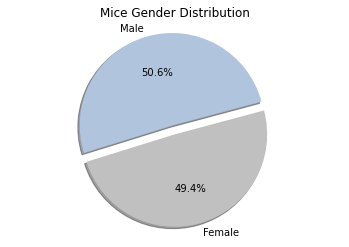

In [128]:
female_vs_male_py = clean_data['Sex'].value_counts()
labels = 'Male','Female'
colors = ['lightsteelblue','silver']
explode = (0, 0.1)
plt.pie(female_vs_male_py, labels=labels, autopct='%1.1f%%', 
        startangle=15, shadow=True, 
        colors=colors, explode=explode)
plt.title('Mice Gender Distribution')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

tumor_vol_Capomulin = pd.DataFrame(
    clean_data.loc[(clean_data['Drug Regimen']== 'Capomulin') & (clean_data['Timepoint']== clean_data['Timepoint'].max()
                                                                ),:]).rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume'})

tumor_vol_Ramicane = pd.DataFrame(clean_data.loc[(clean_data['Drug Regimen']== 'Ramicane') & (clean_data['Timepoint']== clean_data['Timepoint'].max()
                                                                                             ),:]).rename(columns={
    'Tumor Volume (mm3)': 'Final Tumor Volume'})

tumor_vol_Infubinol = pd.DataFrame(clean_data.loc[(clean_data['Drug Regimen']== 'Infubinol') & (clean_data['Timepoint']== clean_data['Timepoint'].max()
                                                                                               ),:]).rename(columns={
    'Tumor Volume (mm3)': 'Final Tumor Volume'})

tumor_vol_Ceftamin = pd.DataFrame(clean_data.loc[(clean_data['Drug Regimen']== 'Ceftamin') & (clean_data['Timepoint']== clean_data['Timepoint'].max()
                                                                                             ),:]).rename(columns={
    'Tumor Volume (mm3)': 'Final Tumor Volume'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_drug = tumor_vol_Capomulin.merge(tumor_vol_Ramicane,
how='outer', on=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Final Tumor Volume']) \
.merge(
    tumor_vol_Infubinol, how='outer', 
    on=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Final Tumor Volume']) \
.merge(tumor_vol_Ceftamin, how='outer', 
    on=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Final Tumor Volume'])

merged_drug.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume,Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,u364,Capomulin,Male,18,17,45,31.023923,3
4,y793,Capomulin,Male,17,17,45,31.896238,2


In [200]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in merged_drug['Drug Regimen']:
    if drug not in treatment:
        treatment.append(drug)

# Create empty list to fill with tumor vol data (for plotting)
one = merged_drug[merged_drug['Drug Regimen'] == 'Capomulin']['Final Tumor Volume']
two = merged_drug[merged_drug['Drug Regimen'] == 'Ramicane']['Final Tumor Volume']
three = merged_drug[merged_drug['Drug Regimen'] == 'Infubinol']['Final Tumor Volume']
four = merged_drug[merged_drug['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume']
to_plot = np.array([one, two, three, four])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_drug['Final Tumor Volume'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 
    
    
# Determine outliers using upper and lower bounds 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 33.48002734
The upper quartile is: 62.14221369
The interquartile range is: 28.66218635
The the median is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


/opt/anaconda3/envs/newpy/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


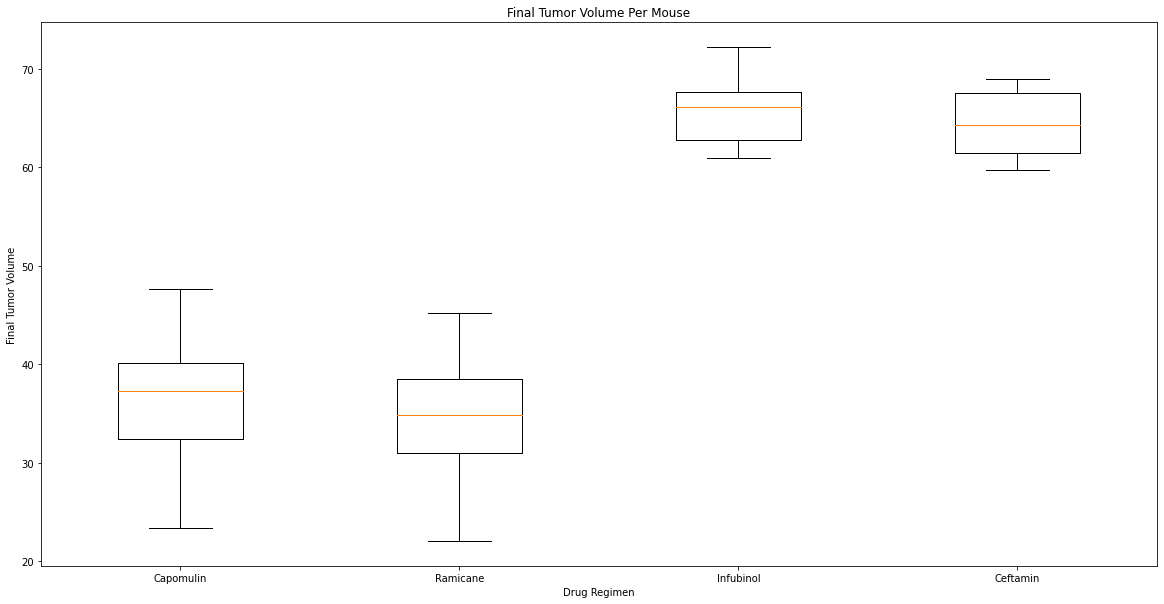

In [201]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(to_plot)
ax.set_title("Final Tumor Volume Per Mouse")
ax.set_xlabel("Drug Regimen")
ax.set_xticklabels(treatment)
ax.set_ylabel("Final Tumor Volume")
plt.show()

In [ ]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Put treatments into a list for for loop (and later for plot labels)
# Locate the rows which contain mice on each drug and get the tumor volumes
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR for Capomulin
quartiles_Capomulin = tumor_vol_Capomulin['Tumor Volume at The last Timepoint'].quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin - lowerq_Capomulin
lower_bound_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)

# Calculate the IQR for Ramicane
quartiles_Ramicane = tumor_vol_Ramicane['Tumor Volume at The last Timepoint'].quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane - lowerq_Ramicane
lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)

# Calculate the IQR for Infubinol
quartiles_Infubinol = tumor_vol_Infubinol['Tumor Volume at The last Timepoint'].quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol - lowerq_Infubinol
lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)

# Calculate the IQR for Ceftamin
quartiles_Ceftamin = tumor_vol_Ceftamin['Tumor Volume at The last Timepoint'].quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin - lowerq_Ceftamin
lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)





# add subset 

# Determine outliers using upper and lower bounds
# Locate the rows which contain mice on each drug and get the tumor volumes       
# add subset 
# Determine outliers using upper and lower bounds
x_axis = capomulin_s185['Timepoint']
y_axis =  capomulin_s185['Tumor Volume (mm3)'] 
fig1, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, y_axis,linewidth=2.0, markersize=15,marker='o')
ax.set(xlabel='Time (Days)', ylabel='Tumor Volume (mm3)', title='Capomulin treatmeant of mouse s185')
plt.show()



## Line and Scatter Plots

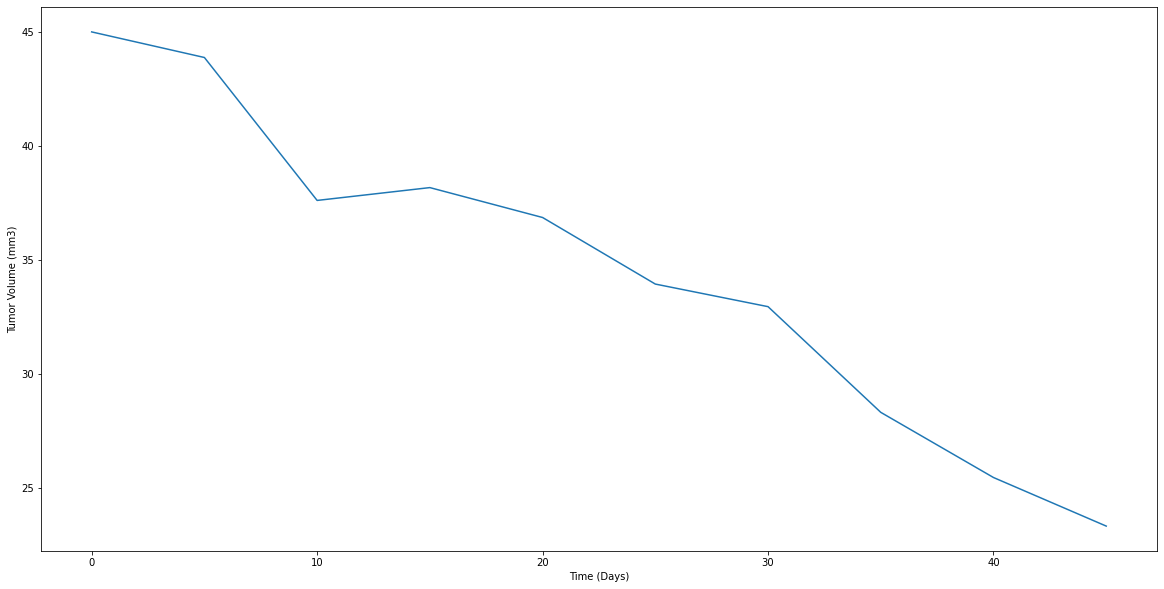

In [160]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_data.loc[(clean_data['Drug Regimen']== 'Capomulin')]
capomulin_s185 =  capomulin.loc[capomulin['Mouse ID'] == 's185',:]
# line plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(capomulin_s185['Timepoint'], capomulin_s185['Tumor Volume (mm3)']) 
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Averag Tumor Volume')

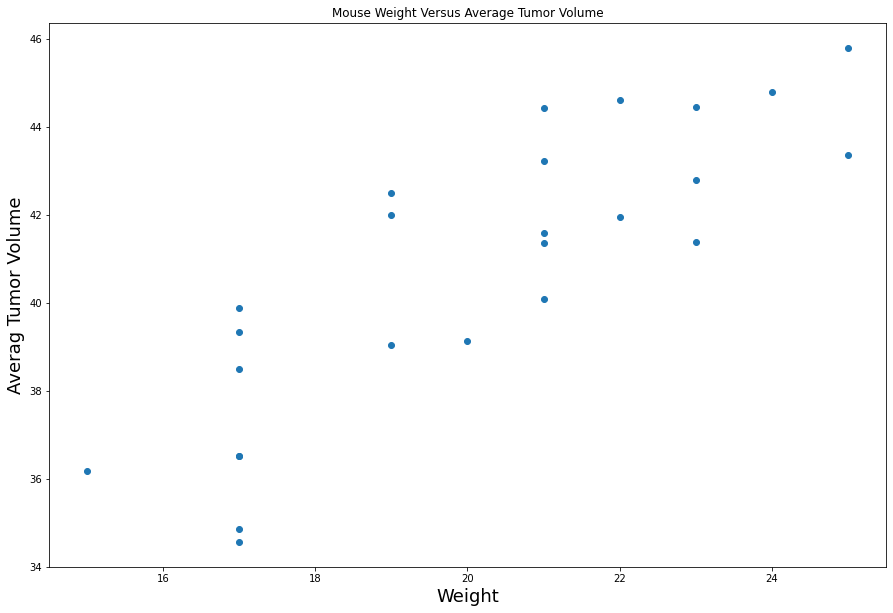

In [195]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_vs_weight = capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()
capomulin_vs_vol = capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(capomulin_vs_weight, capomulin_vs_vol)
ax.set_title('Mouse Weight Versus Average Tumor Volume')
ax.set_xlabel("Weight", fontsize=18)
ax.set_ylabel("Averag Tumor Volume", fontsize=18)


## Correlation and Regression

In [183]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(capomulin_vs_vol, capomulin_vs_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.84


In [184]:
correlation = st.pearsonr(capomulin_vs_vol, capomulin_vs_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


In [185]:
# Perform a linear regression on weight versus tumor volume
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(capomulin_vs_vol, capomulin_vs_weight)

# Create equation of line to calculate predicted tumor volume
vc_fit = vc_slope * capomulin_vs_vol + vc_int
vc_slope

0.7426941826944178

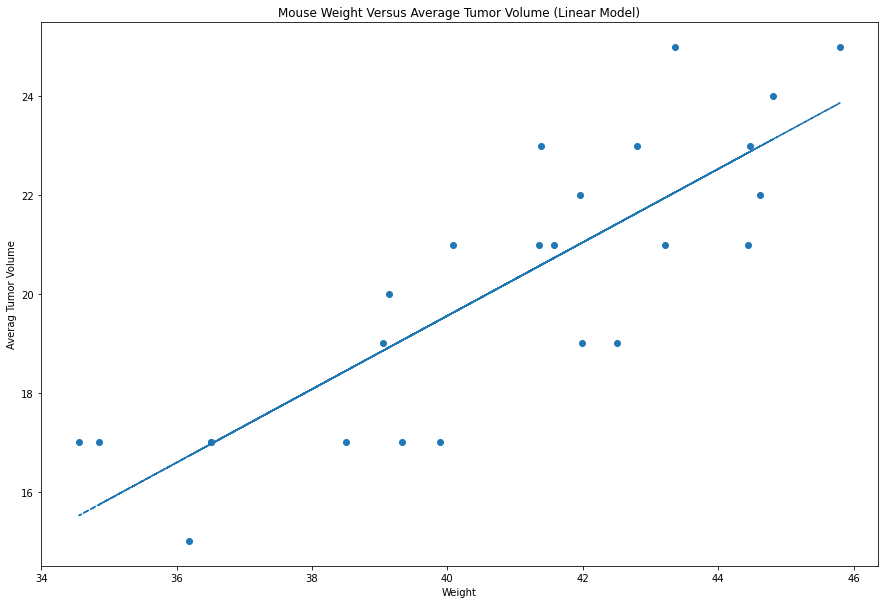

In [196]:
# figure 1
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(capomulin_vs_vol, capomulin_vs_weight)
plt.plot(capomulin_vs_vol,vc_fit,"--")
ax.set_title('Mouse Weight Versus Average Tumor Volume (Linear Model)')
ax.set_xlabel("Weight")
ax.set_ylabel("Averag Tumor Volume")

plt.show()

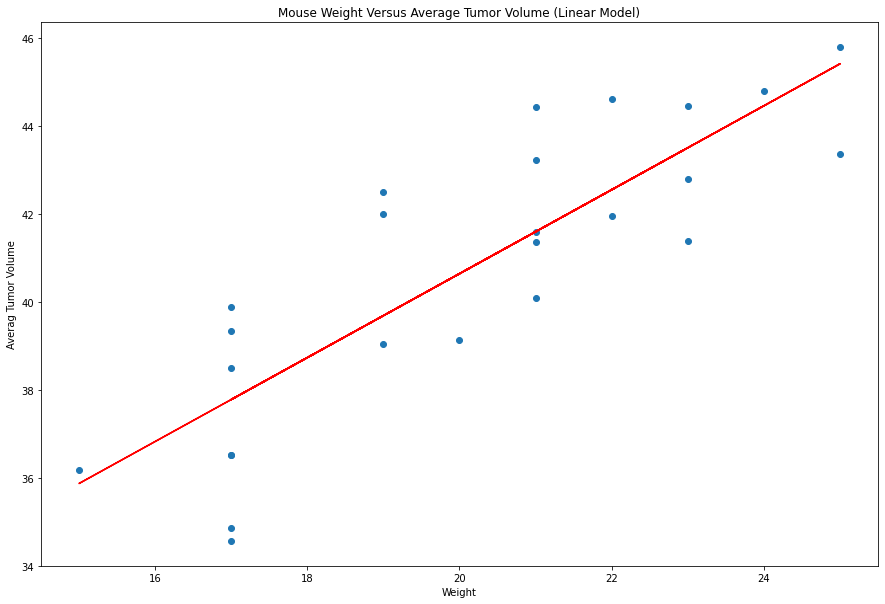

In [198]:
from scipy.stats import linregress

x_values = capomulin_vs_weight
y_values = capomulin_vs_vol 
# Perform a linear regression on weight versus tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Create equation of line to calculate predicted tumor volumes
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# figure 2
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.set_title('Mouse Weight Versus Average Tumor Volume (Linear Model)')
ax.set_xlabel('Weight')
ax.set_ylabel('Averag Tumor Volume')
plt.show()
